In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [11]:
env_name = "Gym_anytrade"

In [ ]:
df1_original = pd.read_csv('../original_scripts/results/Gym_anytrade.csv')
df1_reproduced = pd.read_csv('../results_csv/account_value_ppo_gym_anytrading.csv')
# df2_original = pd.read_csv('account_value_ppo_finrl.csv')
# df2_reproduced = pd.read_csv('finrl.csv')


In [4]:
df1_original

,Date,price,position,total_reward,total_profit,daily_return
0,2023-02-15,153.40367,Short,0.000000,1.000000,NaN
1,2023-02-16,151.80379,Long,0.000000,1.000000,NaN
2,2023-02-17,150.65814,Long,0.000000,1.000000,NaN
3,2023-02-21,146.63863,Long,0.000000,1.000000,NaN
4,2023-02-22,147.06331,Long,-4.256577,0.957429,NaN
...,...,...,...,...,...,...
465,2024-12-20,253.58980,Long,73.243591,0.440825,NaN
466,2024-12-23,254.36703,Long,73.243591,0.440825,NaN
467,2024-12-24,257.28668,Long,84.453766,0.453951,NaN
468,2024-12-26,258.10373,Short,84.453766,0.453951,NaN


In [5]:

df1_reproduced

,date,account_value,std
0,2023-02-15,1.000000,0.0
1,2023-02-16,1.000000,0.0
2,2023-02-17,1.000000,0.0
3,2023-02-21,1.000000,0.0
4,2023-02-22,1.000000,0.0
...,...,...,...
463,2024-12-18,0.327308,0.0
464,2024-12-19,0.327308,0.0
465,2024-12-20,0.327308,0.0
466,2024-12-23,0.327308,0.0


In [ ]:
# df1o
df1o = pd.DataFrame()
df1o['Date'] = df1_original['Date']
V0 = df1_original["total_profit"].iloc[0]
df1o["cum_return"] = df1_original["total_profit"] / V0 - 1.0

# df1r
df1r = pd.DataFrame()
df1r['Date'] = df1_reproduced['date']
V0 = df1_reproduced["account_value"].iloc[0]
df1r["cum_return"] = df1_reproduced["account_value"] / V0 - 1.0





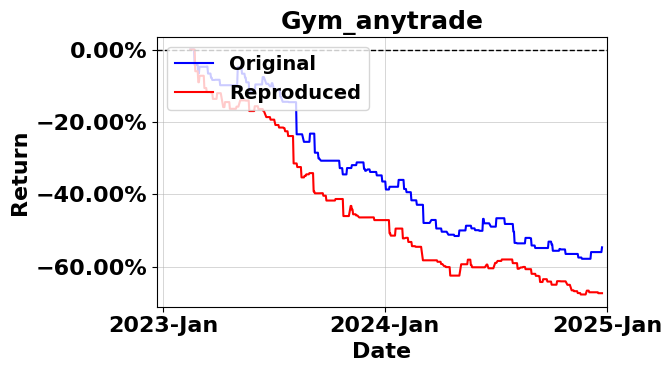

In [12]:
# -*- coding: utf-8 -*-
"""
Single percent-return plot for Project 1 (df1o vs df1r)
"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

def prep(df, date_col="Date", ret_col="cum_return", label=None):
    s = (df.assign(**{date_col: pd.to_datetime(df[date_col])})
           .set_index(date_col)[ret_col]
           .astype(float))
    return s.rename(label) if label else s

# --- Project 1 only (df1o / df1r) ---
s1o = prep(df1o, label="Original")
s1r = prep(df1r, label="Reproduced")
cmp1 = pd.concat([s1o, s1r], axis=1, join="inner").dropna()

# --- X-axis ticks (adjust if your dates differ) ---
start_tick = pd.Timestamp("2023-01-01")
mid_tick   = pd.Timestamp("2024-01-01")
end_tick   = pd.Timestamp("2025-01-01")
x_left  = start_tick - pd.Timedelta(days=10)
x_right = end_tick

plt.rcParams.update({
    "font.size": 16,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 18,
    "axes.titleweight": "bold",
    "legend.fontsize": 14
})

fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(cmp1.index, cmp1["Original"],  color="blue", linewidth=1.5, label="Original")
ax.plot(cmp1.index, cmp1["Reproduced"], color="red",  linewidth=1.5, label="Reproduced")
ax.axhline(0, color="black", linewidth=1, linestyle="--")

ax.set_title(env_name)
ax.set_xlabel("Date")
ax.set_ylabel("Return")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=2))
ax.grid(True, linewidth=0.6, alpha=0.6)
ax.legend(loc="upper left")

ax.set_xlim(x_left, x_right)
ax.set_xticks([start_tick, mid_tick, end_tick])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))

plt.tight_layout()
plt.show()
